<a href="https://colab.research.google.com/github/Harris-5021/PythonFaceDetection/blob/main/face_detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection
Artificial Intelligence and Machine Learning 1

Submission date/time: __07 April 2022, 3PM__


---





## Step 1: Import Machine Learning Libraries for this task

Check all the

`import [library full name] as [short name]`

in the skeleton code. If you use any off-line IDE, such as
PyCharm, make sure you pre-installed all the required Python libraries for the machine learning task. Please
contact the tutor if you need any technical support to set up your coding environment.

If you need any extra tools/libraries, please also add them here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,color,feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Some more libraries of your choice goes here


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 2: Data Preparation
* Mount your google drive to this project
* Load files: `positive_patches.npy` and `negative_patches.npy`
* The dataset has __13233__ positive data and __30000__ negative data
* Reshape the raw patches (1-D 2914 pixels per picture) as 2-D __62*47__ image patches
* Display some positive samples and negative samples

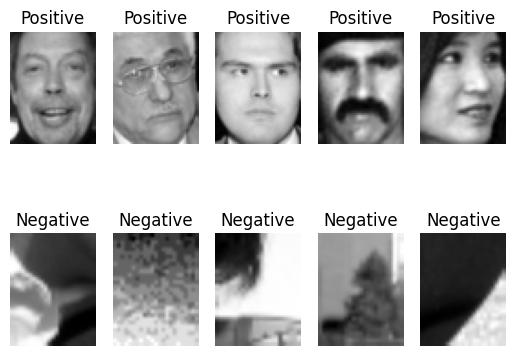

In [3]:

negative_data = np.load('/content/drive/MyDrive/negative_patches.npy')
positive_data = np.load('/content/drive/MyDrive/positive_patches.npy')

# Reshape the positive data to 2-D 62x47 image patches
positive_data_2d = positive_data.reshape(-1, 62, 47)

# Reshape the negative data to 2-D 62x47 image patches
negative_data_2d = negative_data.reshape(-1, 62, 47)

# Display some positive samples
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(positive_data_2d[i], cmap='gray')
    plt.title('Positive')
    plt.axis('off')

# Display some negative samples
for i in range(5):
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(negative_data_2d[i], cmap='gray')
    plt.title('Negative')
    plt.axis('off')

plt.show()




## Step 3: Feature Extraction and Binary Labels
We will use a Sci-kit Learn Image Processing (A Wrap version of the OpenCV) package to extract the 2D HoG features and use them as the feature space for the machine learning algorithms.

Also, face detection uses binary classification algorithms, which requires feature space `X` and labels `y`



In [4]:
from skimage.feature import hog

# Compute HoG features for the positive samples
positive_hog_features = []
for i in range(len(positive_data_2d)):
    hog_features = hog(positive_data_2d[i], orientations=8, pixels_per_cell=(16, 16),
                       cells_per_block=(1, 1), block_norm='L2-Hys', feature_vector=True)
    positive_hog_features.append(hog_features)

# Compute HoG features for the negative samples
negative_hog_features = []
for i in range(len(negative_data_2d)):
    hog_features = hog(negative_data_2d[i], orientations=8, pixels_per_cell=(16, 16),
                       cells_per_block=(1, 1), block_norm='L2-Hys', feature_vector=True)
    negative_hog_features.append(hog_features)

    # Create the labels for the positive and negative samples
positive_labels = np.ones(len(positive_hog_features))
negative_labels = np.zeros(len(negative_hog_features))

# Combine the positive and negative features and labels
X = np.concatenate((positive_hog_features, negative_hog_features))
y = np.concatenate((positive_labels, negative_labels))




## Step 4: Train Your Binary Classification ML Algorithm(s)
* Split the training and test set. Remember to shuffle them
* Use some suitable machine learning algorithms (which one?) to create a classifier.
* If the training takes too long, you may consider saving your trained model

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage import transform

# Load the positive and negative data and labels
positive_data = np.load('/content/drive/MyDrive/positive_patches.npy')
negative_data = np.load('/content/drive/MyDrive/negative_patches.npy')
positive_labels = np.ones(len(positive_data))
negative_labels = np.zeros(len(negative_data))

# Resize the images to a fixed size (e.g., 64x64)
image_size = (64, 64)
positive_data_resized = [transform.resize(patch, image_size) for patch in positive_data]
negative_data_resized = [transform.resize(patch, image_size) for patch in negative_data]

# Combine the positive and negative data and labels
X = np.vstack((positive_data_resized, negative_data_resized))
y = np.concatenate((positive_labels, negative_labels))

# Compute HoG features for the image patches
features = []
for patch in X:
    hog_features = hog(patch, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    features.append(hog_features)
X_features = np.array(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, shuffle=True)

# Train a linear SVM classifier
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Save the trained classifier to a file
import joblib
joblib.dump(clf, "svm_classifier.pkl")




Accuracy: 0.7233722678385567


['svm_classifier.pkl']

## Step 5: Performance Validation

* Use test dataset to calculate the confusion matrix
* If you use more than one algorithm or carried out some comparison tests, generate multiple confusion matrices for each case

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score

# Predict labels for the test set using the trained classifier
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)




[[5808  210]
 [2182  447]]


## Extra Task

Complete the skeleton code gives you a solid foundation to build an effective face detection system. You are
encouraged to carry out more exploration from there and aim at creating a better face detection application. You
can either use taught or untaught techniques for this project. You are welcome to add new functions and improve
the source code. You can discuss the ideas if you have specific additions in mind.


Random forest


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import hog
from skimage import transform
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Load the positive and negative data and labels
positive_data = np.load('/content/drive/MyDrive/positive_patches.npy')
negative_data = np.load('/content/drive/MyDrive/negative_patches.npy')
positive_labels = np.ones(len(positive_data))
negative_labels = np.zeros(len(negative_data))


# Resize the images to a fixed size (e.g., 64x64)
image_size = (64, 64)
positive_data_resized = [transform.resize(patch, image_size) for patch in positive_data]
negative_data_resized = [transform.resize(patch, image_size) for patch in negative_data]

# Combine the positive and negative data and labels
X = np.vstack((positive_data_resized, negative_data_resized))
y = np.concatenate((positive_labels, negative_labels))


# Compute HoG features for the image patches
features = []
patch_size = X[0].shape
for patch in X:
    if patch.shape != patch_size:
        raise ValueError("All patches must have the same size")
    hog_features = hog(patch, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    features.append(hog_features)
X_features = np.array(features)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, shuffle=True)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=20)
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")

# Save the trained classifier to a file
joblib.dump(clf, "random_forest_classifier.pkl")


# Create an array of class labels (1 for positive and 0 for negative)
class_labels = np.concatenate((np.ones(len(positive_data)), np.zeros(len(negative_data))))






Accuracy: 0.7313519139585983
Confusion Matrix: 
[[5557  446]
 [1877  767]]


Neural network

In [1]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Load the signal data
negative_data = np.load('/content/drive/MyDrive/negative_patches.npy')
positive_data = np.load('/content/drive/MyDrive/positive_patches.npy')
X = np.concatenate((negative_data, positive_data), axis=0)
y = np.concatenate((np.zeros(len(negative_data)), np.ones(len(positive_data))), axis=0)

# Resize each signal to 64x64
resized_X = []
for signal in X:
    resized_signal = cv2.resize(signal, (64, 64))
    resized_X.append(resized_signal)

# Convert the resized signals to a numpy array
X_2d = np.array(resized_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Create a neural network model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train.reshape(-1, 64, 64, 1), y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test.reshape(-1, 64, 64, 1), y_test, verbose=0)
print("Accuracy: %.2f%%" % (accuracy*100))


Epoch 1/10
 281/1081 [======>.......................] - ETA: 20:21 - loss: 3.3430 - accuracy: 0.7915

KeyboardInterrupt: 